In [1]:
import pandas as pd
df = pd.read_csv("amzn.us.csv")
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1,1997-05-19,1.76,1.77,1.62,1.71,6106800,0
2,1997-05-20,1.73,1.75,1.64,1.64,5467200,0
3,1997-05-21,1.64,1.65,1.38,1.43,18853200,0
4,1997-05-22,1.44,1.45,1.31,1.40,11776800,0
...,...,...,...,...,...,...,...
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0


# Question 1

## 1. Time series indexing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153 entries, 0 to 5152
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     5153 non-null   object 
 1   Open     5153 non-null   float64
 2   High     5153 non-null   float64
 3   Low      5153 non-null   float64
 4   Close    5153 non-null   float64
 5   Volume   5153 non-null   int64  
 6   OpenInt  5153 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 281.9+ KB


In [3]:
# set colume "Date" as index
df = df.set_index(['Date'])
df

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1997-05-19,1.76,1.77,1.62,1.71,6106800,0
1997-05-20,1.73,1.75,1.64,1.64,5467200,0
1997-05-21,1.64,1.65,1.38,1.43,18853200,0
1997-05-22,1.44,1.45,1.31,1.40,11776800,0
...,...,...,...,...,...,...
2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0
2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0


In [4]:
# set the type as datetime64[ns] so index will be a date format
df.index = df.index.astype('datetime64[ns]')

In [5]:
df.index

DatetimeIndex(['1997-05-16', '1997-05-19', '1997-05-20', '1997-05-21',
               '1997-05-22', '1997-05-23', '1997-05-27', '1997-05-28',
               '1997-05-29', '1997-05-30',
               ...
               '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
               '2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10'],
              dtype='datetime64[ns]', name='Date', length=5153, freq=None)

In [6]:
# set Difference as the exogenous data in another colume
df["Difference"] = df["Open"] - df["Close"] 

For the differenec between would considered as useful side information, which computed by `Open - Close`. The side data can be anything contemporaneous that might have a correlation with the volume data, although the difference is not the best exogenous data, it still a good data that shows how the volume change instead, even not intuitively to show the trend like `Open`, `High` does.

In [7]:
df.head(5)

,Open,High,Low,Close,Volume,OpenInt,Difference
Date,,,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000,0,0.24
1997-05-19,1.76,1.77,1.62,1.71,6106800,0,0.05
1997-05-20,1.73,1.75,1.64,1.64,5467200,0,0.09
1997-05-21,1.64,1.65,1.38,1.43,18853200,0,0.21
1997-05-22,1.44,1.45,1.31,1.40,11776800,0,0.04


# Question 2

In [8]:
df2 = df.interpolate(method="polynomial", order =3)

# Using Datetime index to get the year, month and day of the week
# assigning it to the new column in the dataframe df2, so that we can use it to visualise different trend cycle or seasonality
df2['year']=df2.index.year
df2['month']=df2.index.month_name()
df2['day_of_week']  = df2.index.day_name()

df2.head(5)

,Open,High,Low,Close,Volume,OpenInt,Difference,year,month,day_of_week
Date,,,,,,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000,0,0.24,1997,May,Friday
1997-05-19,1.76,1.77,1.62,1.71,6106800,0,0.05,1997,May,Monday
1997-05-20,1.73,1.75,1.64,1.64,5467200,0,0.09,1997,May,Tuesday
1997-05-21,1.64,1.65,1.38,1.43,18853200,0,0.21,1997,May,Wednesday
1997-05-22,1.44,1.45,1.31,1.40,11776800,0,0.04,1997,May,Thursday


For this analysis, we use data from 2008 year and indexing help us to slice the series for a particular timeframe.

In [9]:
df2008 = df2['2008']

/tmp/ipykernel_33336/1803550559.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df2008 = df2['2008']


## Open

Text(0.5, 0, 'Date')

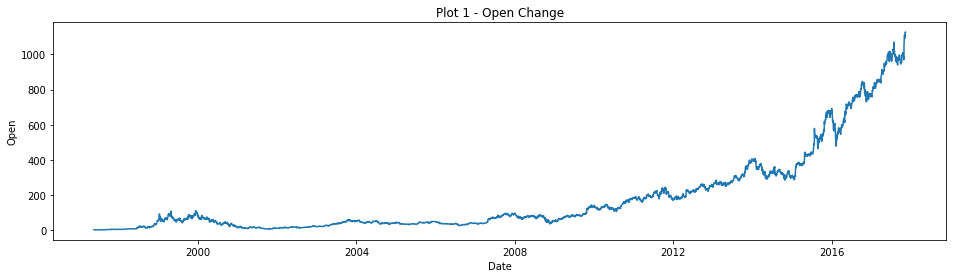

In [10]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting all the open price from year 1997 to 2017. 
plt.figure(figsize=(16,4))
plt.plot(df2['Open'])
plt.title('Plot 1 - Open Change')
plt.ylabel('Open')
plt.xlabel('Date')

This graph is the visualisation of the entir data set, which describe the trend of open price on AMZN from 1997-05-16 to 2017-11-10. 

Text(0, 0.5, 'Open')

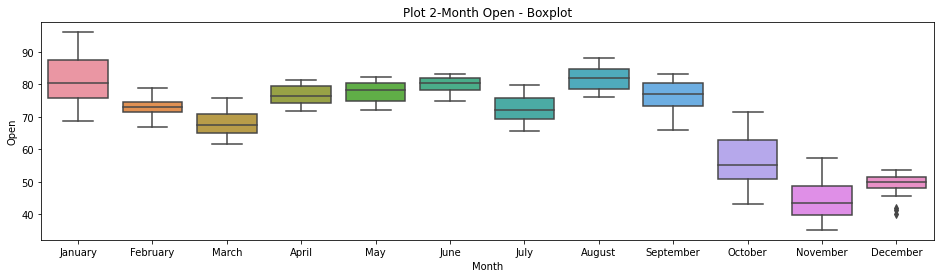

In [11]:
# Boxplot to view 2008 monthly open price
fig, ax = plt.subplots(figsize=(16,4))
sns.boxplot(data=df2008, x='month', y=df2008['Open'], ax=ax)
ax.set_title("Plot 2-Month Open - Boxplot")
ax.set_xlabel('Month')
ax.set_ylabel('Open')

This boxplot shows the trend and features that happens in 2008, which shows a sharp decline from toppest over 95 to the lowest almost 30. Espacially between September and November, due to the financial crisis

## High

Text(0.5, 0, 'Date')

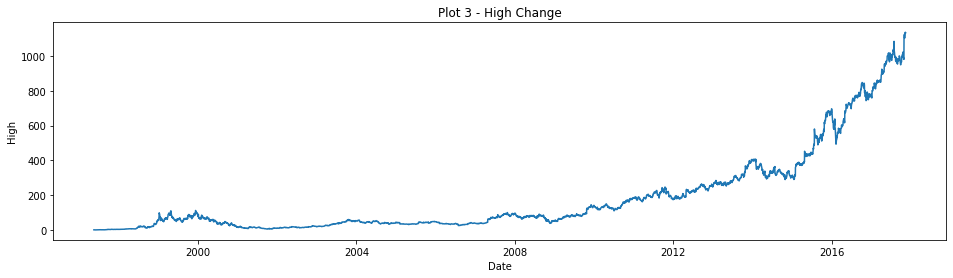

In [12]:
# Plotting all the high price from year 1997 to 2017. 
plt.figure(figsize=(16,4))
plt.plot(df2['High'])
plt.title('Plot 3 - High Change')
plt.ylabel('High')
plt.xlabel('Date')

This graph is the visualisation of the entir data set, which describe the trend of high price on AMZN from 1997-05-16 to 2017-11-10.

Text(0, 0.5, 'High')

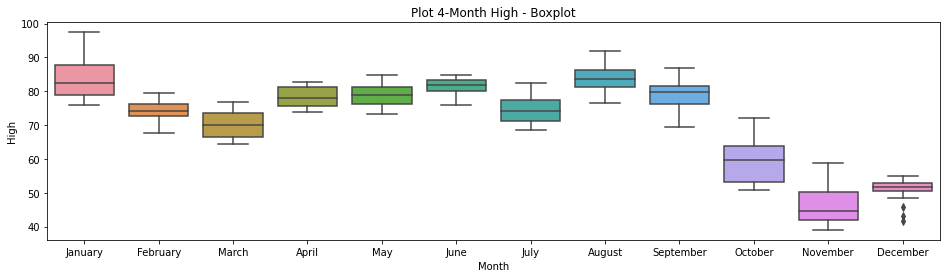

In [13]:
# Boxplot to view 2008 monthly high price
fig, ax = plt.subplots(figsize=(16,4))
sns.boxplot(data=df2008, x='month', y=df2008['High'], ax=ax)
ax.set_title("Plot 4-Month High - Boxplot")
ax.set_xlabel('Month')
ax.set_ylabel('High')

This boxplot shows the trend and features that happens in 2008, which shows a sharp decline from toppest over 95 to the lowest almost 30. Espacially between September and November, due to the financial crisis, also there have more outliers occurs in December

## Low

Text(0.5, 0, 'Date')

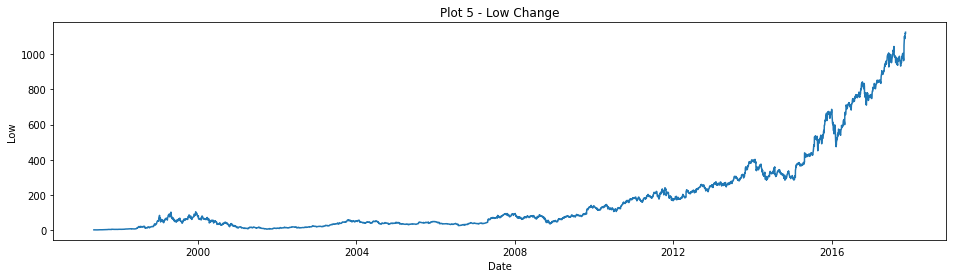

In [14]:
# Plotting all the low price from year 1997 to 2017. 
plt.figure(figsize=(16,4))
plt.plot(df2['Low'])
plt.title('Plot 5 - Low Change')
plt.ylabel('Low')
plt.xlabel('Date')

This graph is the visualisation of the entir data set, which describe the trend of low price on AMZN from 1997-05-16 to 2017-11-10.

Text(0, 0.5, 'Low')

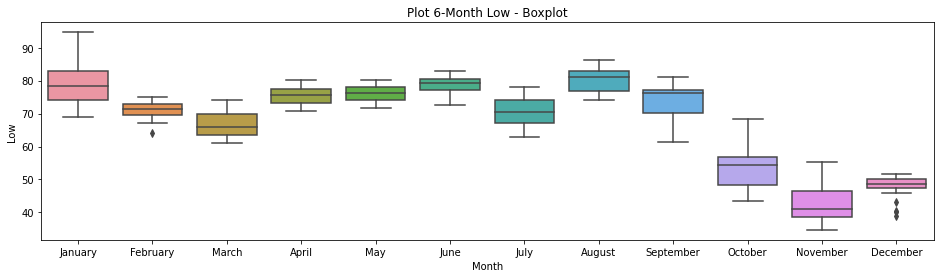

In [15]:
# Boxplot to view 2008 monthly low price
fig, ax = plt.subplots(figsize=(16,4))
sns.boxplot(data=df2008, x='month', y=df2008['Low'], ax=ax)
ax.set_title("Plot 6-Month Low - Boxplot")
ax.set_xlabel('Month')
ax.set_ylabel('Low')

This boxplot shows the trend and features that happens in 2008, which shows a sharp decline from toppest over 95 to the lowest almost 30. Espacially between September and November, due to the financial crisis, also there have more outliers occurs in December

## Close

Text(0.5, 0, 'Date')

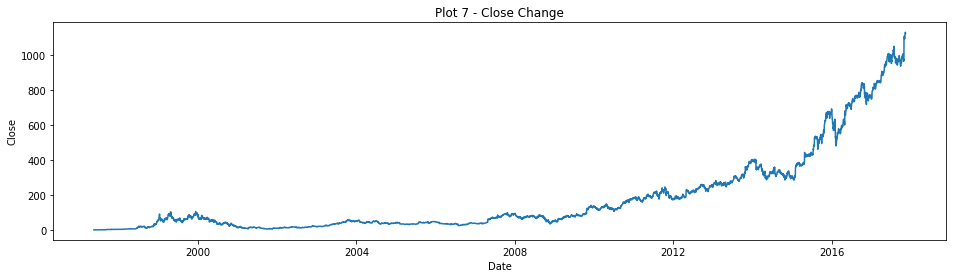

In [16]:
# Plotting all the close price from year 1997 to 2017. 
plt.figure(figsize=(16,4))
plt.plot(df2['Close'])
plt.title('Plot 7 - Close Change')
plt.ylabel('Close')
plt.xlabel('Date')

This graph is the visualisation of the entir data set, which describe the trend of close price on AMZN from 1997-05-16 to 2017-11-10.

Text(0, 0.5, 'Close')

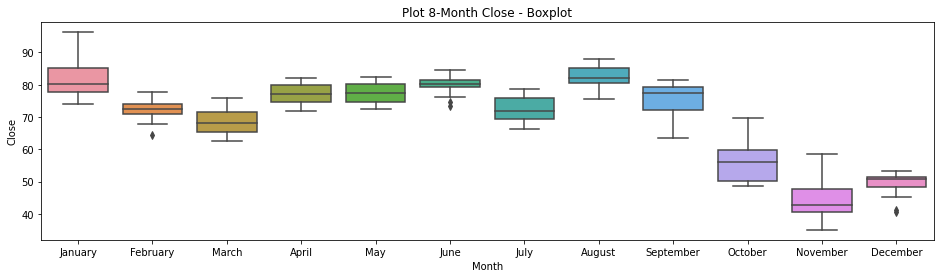

In [17]:
# Boxplot to view 2008 monthly close price
fig, ax = plt.subplots(figsize=(16,4))
sns.boxplot(data=df2008, x='month', y=df2008['Close'], ax=ax)
ax.set_title("Plot 8-Month Close - Boxplot")
ax.set_xlabel('Month')
ax.set_ylabel('Close')

This boxplot shows the trend and features that happens in 2008, which shows a sharp decline from toppest over 95 to the lowest almost 30. Espacially between September and November, due to the financial crisis.

## Volume

Text(0.5, 0, 'Date')

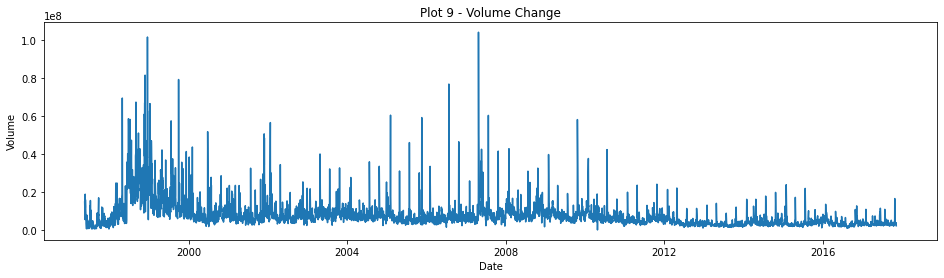

In [18]:
# Plotting all the data from 1997 to 2017. plot() uses line as a default
plt.figure(figsize=(16,4))
plt.plot(df2['Volume'])
plt.title('Plot 9 - Volume Change')
plt.ylabel('Volume')
plt.xlabel('Date')

This graph is the visualisation of the entir data set, which describe the trend of volume on AMZN from 1997-05-16 to 2017-11-10.

Text(0, 0.5, 'Volume')

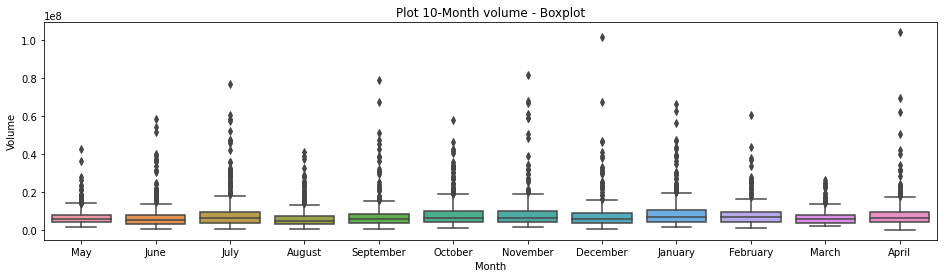

In [19]:
# Boxplot to view all years monthly volume
fig, ax = plt.subplots(figsize=(16,4))
sns.boxplot(data=df2, x='month', y=df2['Volume'], ax=ax)
ax.set_title("Plot 10-Month volume - Boxplot")
ax.set_xlabel('Month')
ax.set_ylabel('Volume')

This boxplot shows the trend and features that happens in from 1997 to 2017, the vast majority of volume is concentrated at the very bottom of the graph, and we can observe a very large amount of outliers, which is due to the fact that at different year, different minority of people will buy or sell stocks in large quantities, thus we have those outliers occurs.

Text(0, 0.5, 'Volume')

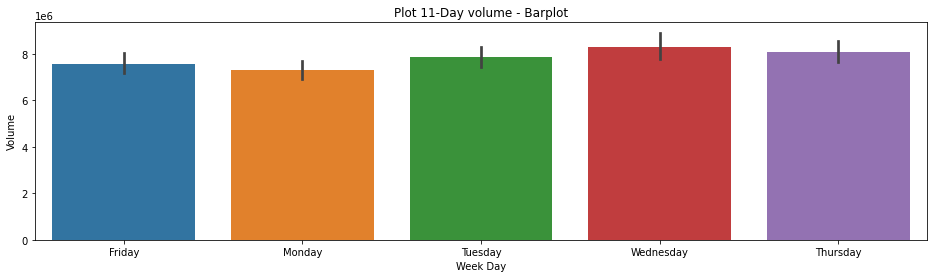

In [20]:
# Barplot to view 1997 to 2017 weekly volumes
fig, axes = plt.subplots(1,1,squeeze=False)
fig.set_size_inches(16,4)
sns.barplot(data=df2, x='day_of_week', y=df2['Volume'], ax=axes[0,0])
axes[0,0].set_title("Plot 11-Day volume - Barplot")
axes[0,0].set_xlabel('Week Day')
axes[0,0].set_ylabel('Volume')

As we can see, every week day have almost the same volumes.

Text(0, 0.5, 'Volume')

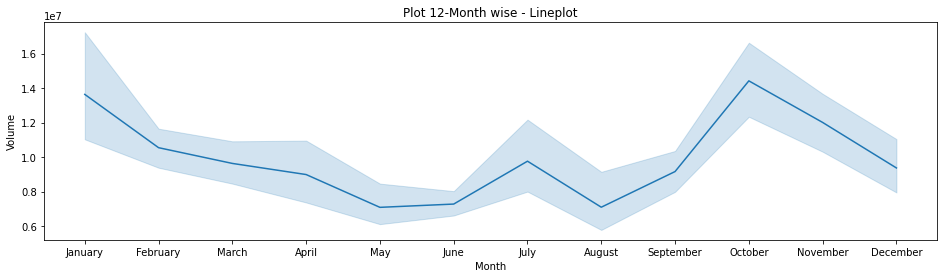

In [21]:
# lineplot from  seaborn package shows the trend-line along with the confidence intervals (i.e. variation of data at each time point)
fig, axes = plt.subplots(1,1,squeeze=False)
fig.set_size_inches(16,4)
sns.lineplot(data=df2008, x='month', y=df2008['Volume'], ax=axes[0,0])
axes[0,0].set_title("Plot 12-Month wise - Lineplot")
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Volume')

Show the trend of volumes that trade in 2008, the volume number has a siginicant increase from August to October due to the financial crisis, the price of the stock drops sharply during this period, and people buy a lot of stocks to reduce their losses or hope to make money from this opportunity, and the volumes reaches peak at almost 1.4 at that time.

Text(0, 0.5, 'Volume')

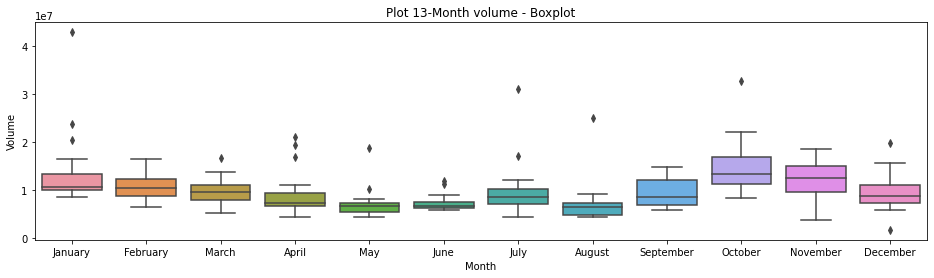

In [22]:
# Boxplot to view 2008 monthly volume
fig, ax = plt.subplots(figsize=(16,4))
sns.boxplot(data=df2008, x='month', y=df2008['Volume'], ax=ax)
ax.set_title("Plot 13-Month volume - Boxplot")
ax.set_xlabel('Month')
ax.set_ylabel('Volume')

This boxplot shows the trend and features that happens in 2008, the volumes increased sharply from August to October, which we can observed from the IQR trend though this 3 months.

Text(0, 0.5, 'Volume')

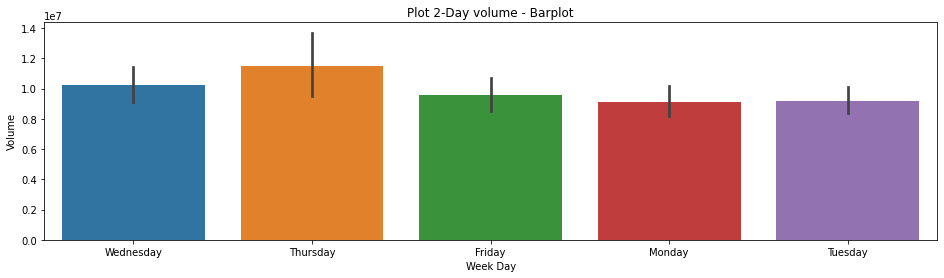

In [23]:
# Barplot to view 2008 weekly volumes
fig, axes = plt.subplots(1,1,squeeze=False)
fig.set_size_inches(16,4)
sns.barplot(data=df2008, x='day_of_week', y=df2008['Volume'], ax=axes[0,0])
axes[0,0].set_title("Plot 2-Day volume - Barplot")
axes[0,0].set_xlabel('Week Day')
axes[0,0].set_ylabel('Volume')

The volumes in Thrusdat will always higher than other days

In [24]:
grp = df2[["Open", "High", "Low", "Close", "Volume", "Difference", "year"]].groupby("year").corr()
# plot out the heatmap
grp.style.background_gradient(cmap='YlOrRd')

This is the heat map of the correlation in different year, we can observe that there is a definite link between trading volumes and other variables, but they differ as time changes, like the correlation between volume and others are all reach to almost 0.5, but the correlation like in year 1997, it may has some negetive correlation but not too much.

# Question 3

In [25]:
# split the data into training and testing series, and selecting the testing series to be the last three months of the data.
train, test = df[0:-50], df[-50:]

In [26]:
df_temp = pd.DataFrame(train['Volume'])
# give a period for our dateindex, B means bussiness day, and fill null records as 0
df_temp = df_temp.resample('B').mean().fillna(0)
df_temp.head(5)

,Volume
Date,
1997-05-16,14700000.0
1997-05-19,6106800.0
1997-05-20,5467200.0
1997-05-21,18853200.0
1997-05-22,11776800.0


## Automatic decomposition of volume

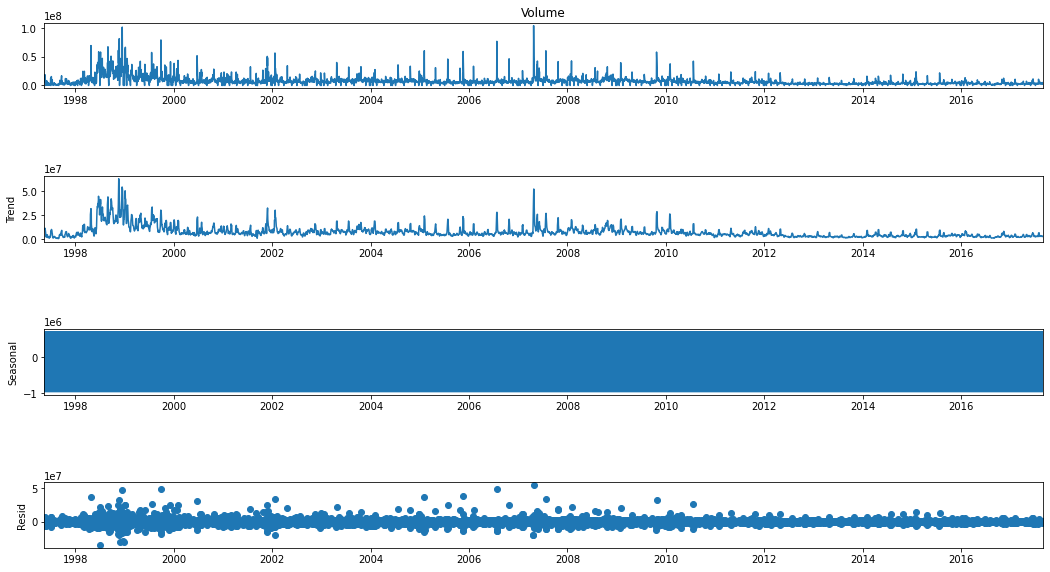

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# because we use bussiness day as the period, so we type period = 5
str_res = seasonal_decompose(df_temp['Volume'],period = 5)
fig = str_res.plot()
fig.set_size_inches((16, 9))

In [28]:
# add three columns to df_temp, which is easier to compare with manual data later
trend = str_res.trend
seasonal = str_res.seasonal 
residual = str_res.resid

df_temp['auto_trend'] = trend
df_temp['auto_seasonal']= seasonal
df_temp['auto_residual']= residual

<AxesSubplot:xlabel='Date'>

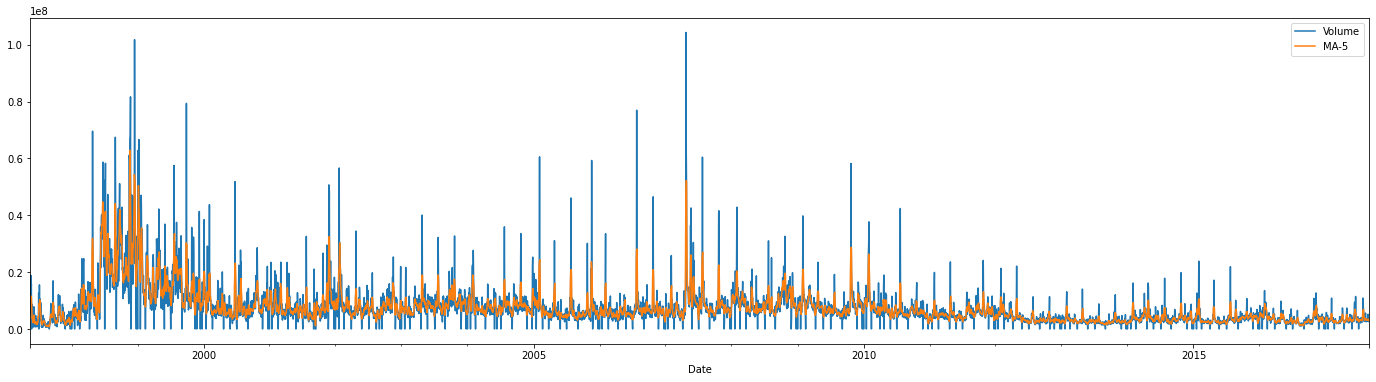

In [29]:
# roll to 5 for one week
df_temp['MA-5'] = df_temp['Volume'].rolling(5, center = True).mean()
df_temp[['Volume','MA-5']].plot(figsize=(24,6))

This does smooth the data, with regular daily "seasonal" patterns around the MA plots. Zooming in shows them clearly, but it's not completely clear which MA is the best for this data. Go with the MA-5.

<AxesSubplot:xlabel='Date'>

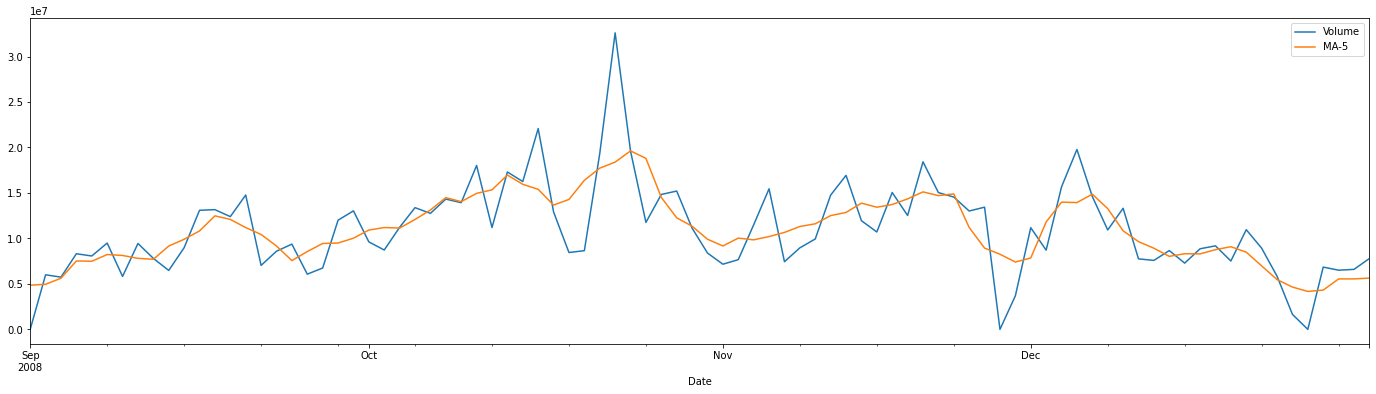

In [30]:
df_temp['2008-09-01':'2008-12-31'][['Volume','MA-5']].plot(figsize=(24,6))

The MA-5 plot itself shows a pattern, but it is not seasonality. The pattern visible a dependence of the current value of the timeseries on previous values.

## Calculate the de-trended series

The next step is to calculate the de-trended volume series. This is straightfroward: subtract the MA trend from the original volume data.

<AxesSubplot:xlabel='Date'>

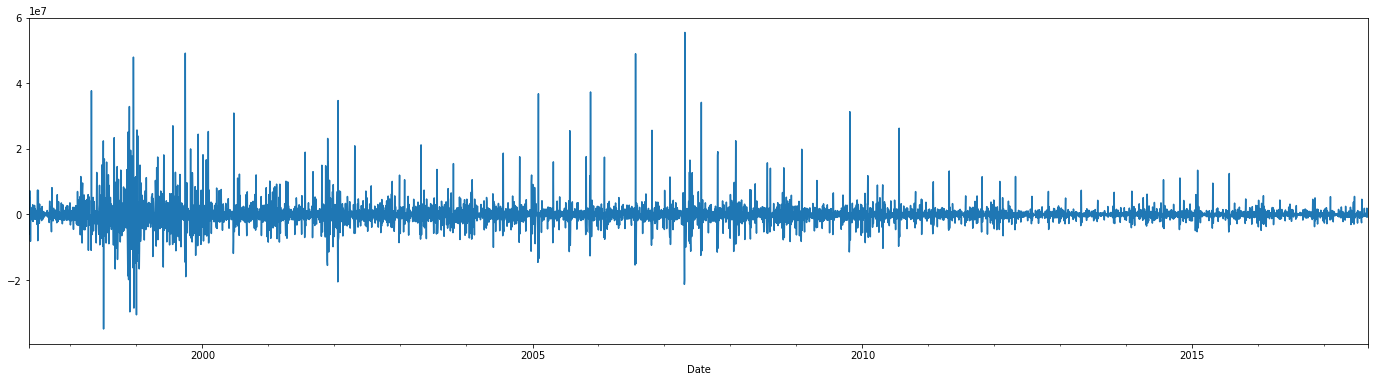

In [31]:
df_temp['volume-detrended'] = df_temp['Volume'] - df_temp['MA-5']
df_temp['volume-detrended'].plot(figsize=(24,6))

## Estimate the seasonal component

the next step is to estimate the seasonal component. There are a rage of ways to do this, with varying degrees of sophistication. However, we will use the most straightforward, which is to estimate the mean each day of the weekday. To do this, use the 'groupby' method from pandas.

<AxesSubplot:xlabel='Date'>

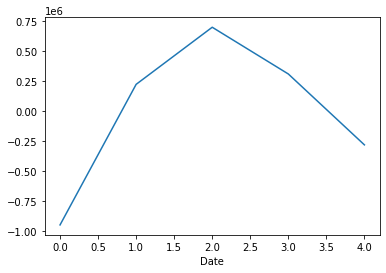

In [32]:
raw_weekly_means = df_temp.groupby(df_temp.index.weekday)['volume-detrended'].mean()
raw_weekly_means.plot()

This is very close, but the seasonal components need to sum to zero or a bias will be introduced into the model. This adjustment is easy to implement:

<AxesSubplot:xlabel='Date'>

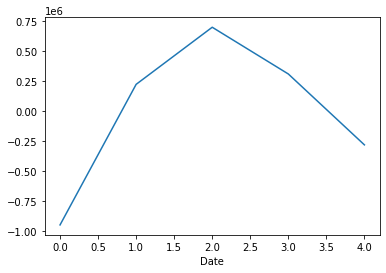

In [33]:
# Shift values so that seasonal components sum to zero
adjustment = raw_weekly_means.sum()/ 5
weekly_means = raw_weekly_means - adjustment
weekly_means.plot()

This is exactly as we want. 

Now we have to fill the series for the entire duration of the timeseries. To do this, use numpy's tile() method. Two trick are involved: 
1. Get the lenth of the seasonal data input equal to the length of df_temp
2. Start the seasonal data at the correct time step

<AxesSubplot:xlabel='Date'>

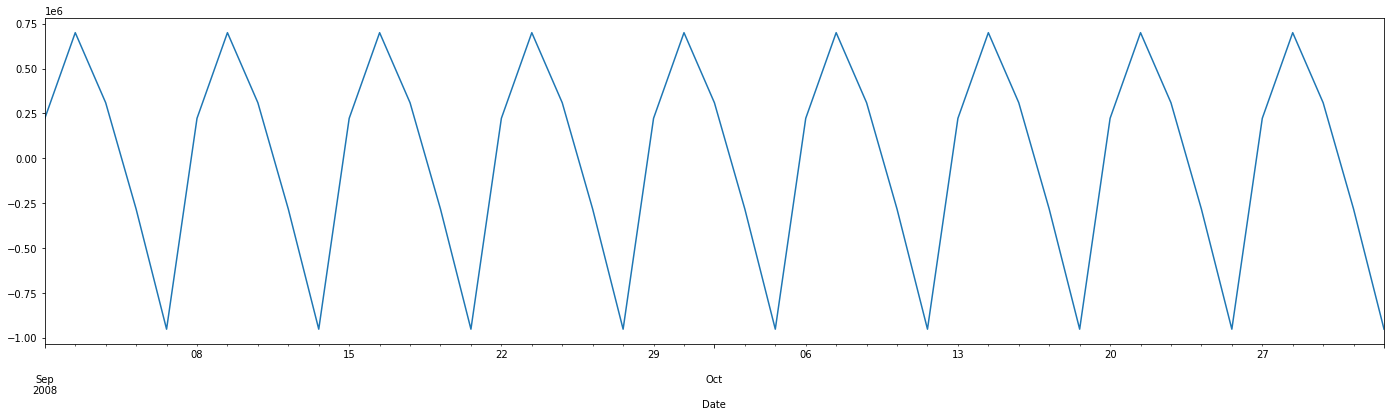

In [34]:
import numpy as np
# tile the values into the dataframe so that the entire series is filled
seasonal = np.tile(weekly_means,int(np.floor(len(df_temp)/5)))
# used typeout to check lengths:
# len(seasonal), len(df_temp)
df_temp['volume-seasonal'] = seasonal
df_temp['2008-09-01':'2008-10-31']['volume-seasonal'].plot(figsize=(24,6))

## Calculate the residual component

The last step is to calulate the residual, by subtracting the seasonal component from the detrended data.

<AxesSubplot:xlabel='Date'>

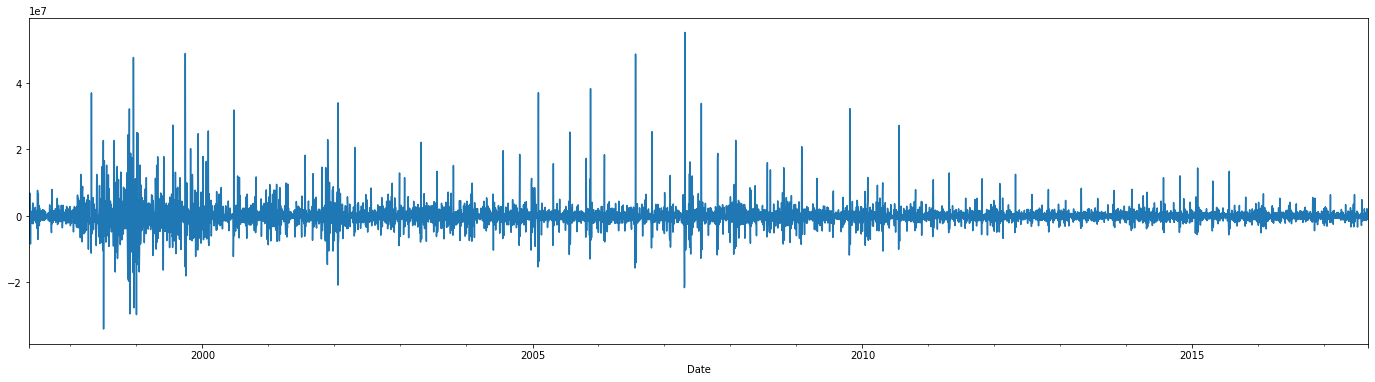

In [35]:
df_temp['volume-residual'] = df_temp['volume-detrended'] - df_temp['volume-seasonal']
df_temp['volume-residual'].plot(figsize=(24,6))

In [36]:
df_temp.head(5)

,Volume,auto_trend,auto_seasonal,auto_residual,MA-5,volume-detrended,volume-seasonal,volume-residual
Date,,,,,,,,
1997-05-16,14700000.0,NaN,-282101.864892,NaN,NaN,NaN,-950308.018578,NaN
1997-05-19,6106800.0,NaN,-950308.018578,NaN,NaN,NaN,222994.445202,NaN
1997-05-20,5467200.0,11380800.0,222994.445202,-6.136594e+06,11380800.0,-5913600.0,699748.450798,-6.613348e+06
1997-05-21,18853200.0,11628240.0,699748.450798,6.525212e+06,11628240.0,7224960.0,309666.987471,6.915293e+06
1997-05-22,11776800.0,10406880.0,309666.987471,1.060253e+06,10406880.0,1369920.0,-282101.864892,1.652022e+06


Compared with automatic decomposition of volume, our manual decomposition get the same trend.

Putting the four plots on one figure:

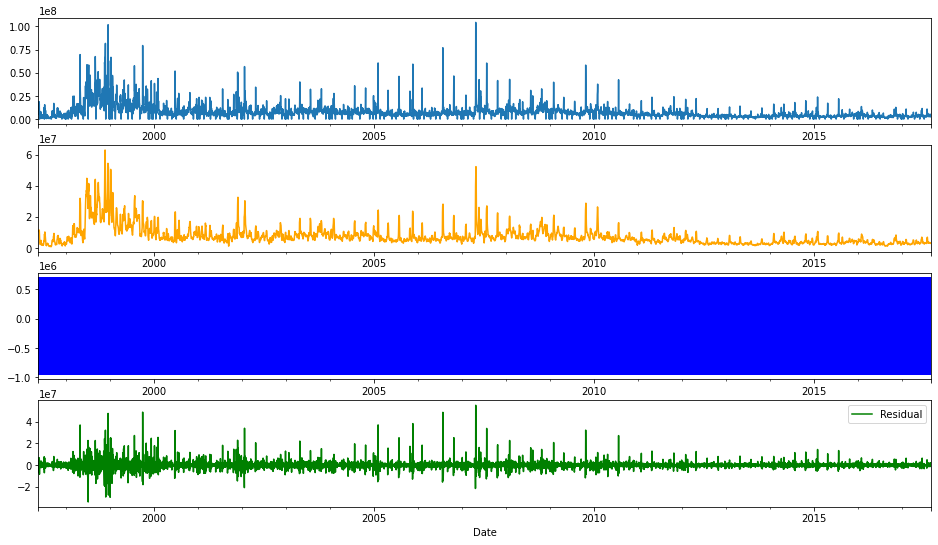

In [37]:
import matplotlib.pyplot as plt
fig, ax_str = plt.subplots(4)
df_temp['Volume'].plot(label='Original', ax=ax_str[0])
df_temp['MA-5'].plot(color='orange', label='MA-5 Trend', ax=ax_str[1])
df_temp['volume-seasonal'].plot(color='blue', label='Seasonal', ax=ax_str[2])
df_temp['volume-residual'].plot(color='green', label= 'Residual', ax=ax_str[3])
fig.set_size_inches((16, 9))
plt.legend()
plt.show()

Looking closer at two months:

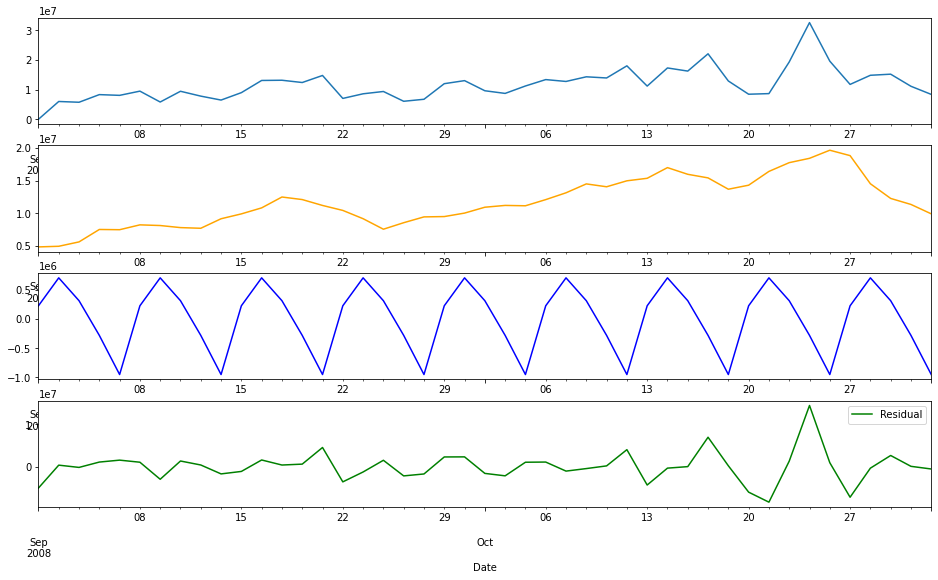

In [38]:
fig, ax_str_2 = plt.subplots(4)
df_temp['Volume']['2008-09-01':'2008-11-01'].plot(label='Original', ax=ax_str_2[0])
df_temp['MA-5']['2008-09-01':'2008-11-01'].plot(color='orange', label='MA-5 Trend', ax=ax_str_2[1])
df_temp['volume-seasonal']['2008-09-01':'2008-11-01'].plot(color='blue', label='Seasonal', ax=ax_str_2[2])
df_temp['volume-residual']['2008-09-01':'2008-11-01'].plot(color='green', label= 'Residual', ax=ax_str_2[3])
fig.set_size_inches((16, 9))
plt.legend()
plt.show()

# Question 4

## Modelling trends with ARIMA

###  Check for stationarity

To fig an autoregressive model or an ARIMA model that contains an AR component, the data must be stationary. The criteria for stationarity is that the data is:
- roughly horizontal
- constant variance
- no patterns predictable in the long-term

We want to modelthe trend of the termperature data with an ARIMA model, so we have to first check that it is stationary by looking at its plot.

<AxesSubplot:xlabel='Date'>

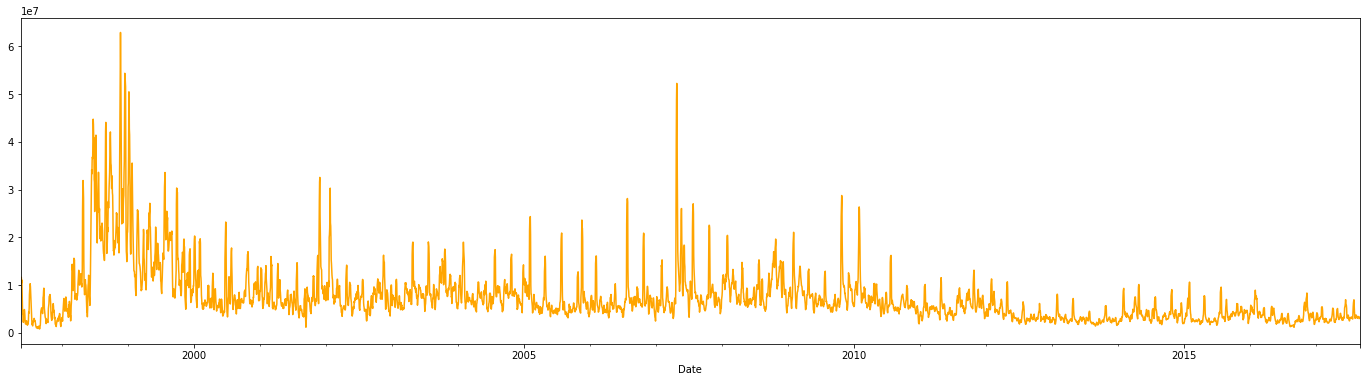

In [39]:
df_temp['MA-5'].plot(color='orange', figsize=(24,6))

To attempt to make the data stationary, we can difference it.

<AxesSubplot:xlabel='Date'>

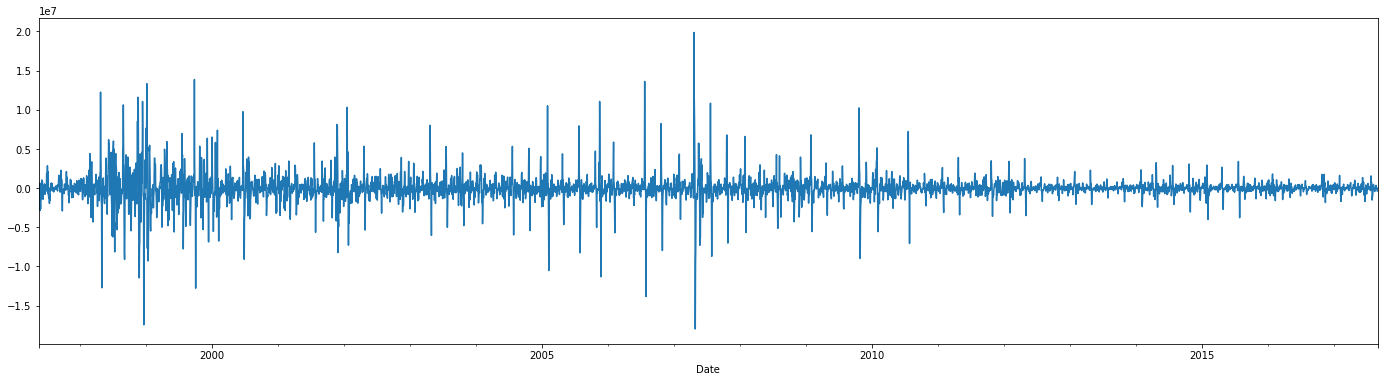

In [40]:
trend_d1 = df_temp['MA-5'].diff()
trend_d1.plot(figsize=(24,6))

This still contains lots of sub-series where the mean value moves up and down, and the variance (variability) is not constant throughout, so difference it again.

<AxesSubplot:xlabel='Date'>

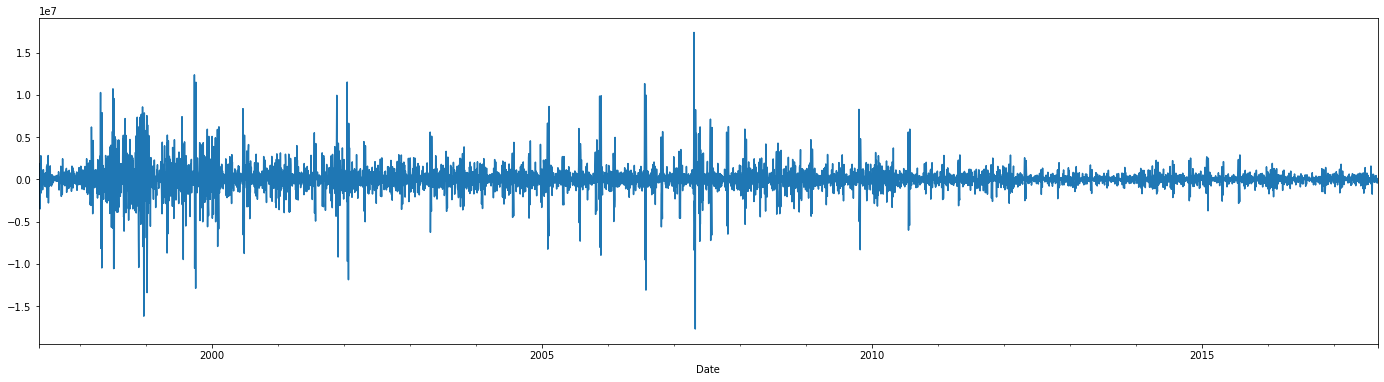

In [41]:
trend_d2 = trend_d1.diff()
trend_d2.plot(figsize=(24,6))

This is much better. It is not perfect, but it is good enough for us to apply an ARIMA model to. 

<b>Keep note of <i>d</i> = 2.</b>

###  Fit a lower order model

Next we use the ARIMA fitting and analysis tools from StatsModels.

#### Evidence of autocorrelation?

Check if there is any evidence of autocorrelation in the data using the ACF and PCF plots (autocorrelation and partial autocorrelation).

In [42]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm

In [43]:
trend_d2 = trend_d2.dropna()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


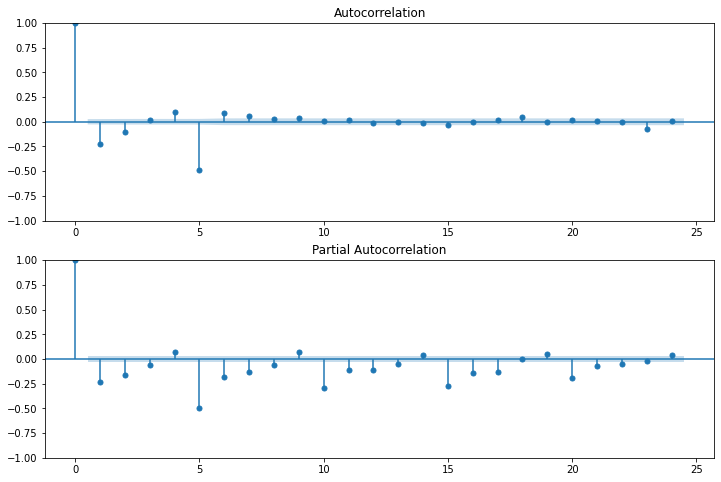

In [44]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend_d2, lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend_d2, lags=24, ax=ax2)

Here are the different steps that can dicide the p,d,p value:
1. look at an autocorrelation graph of the data (will help if Moving Average (MA) model is appropriate)
2. look at a partial autocorrelation graph of the data (will help if AutoRegressive (AR) model is appropriate)
3. look at extended autocorrelation chart of the data (will help if a combination of AR and MA are needed)
4. try Akaike's Information Criterion (AIC) on a set of models and investigate the models with the lowest AIC values
5. try the Schwartz Bayesian Information Criterion (BIC) and investigate the models with the lowest BIC values

Based on these steps and our graph, we can find that at the third point in autocorrelation is the last point outside the confidence interval, and for the forth point in partial autocorrelation is also the last point outside the confidence interval. In addition, which will has the smallest BIC by different p,d,q choice.

Therefore, we may choose `p = 2, d = 2 and q = 3`.

#### Fit your first ARIMA model

Now that the data has been made stationary, it can be modelled with an ARMA process. However, when using the software, it is best to use the full ARIMA model and set d=2 as determined above. This is a simple call to the ARIMA method in StatsModels, starting with p =2 and q=3.

In [45]:
arima_2_2_3 = ARIMA(df_temp["MA-5"], order=(2, 2, 3)).fit()
print(arima_2_2_3.summary())

                               SARIMAX Results                                
Dep. Variable:                   MA-5   No. Observations:                 5295
Model:                 ARIMA(2, 2, 3)   Log Likelihood              -82176.919
Date:                Mon, 07 Nov 2022   AIC                         164365.838
Time:                        04:45:33   BIC                         164405.283
Sample:                    05-16-1997   HQIC                        164379.623
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9523      0.008   -123.211      0.000      -0.967      -0.937
ar.L2         -0.3159      0.008    -41.885      0.000      -0.331      -0.301
ma.L1          0.6166      0.008     73.767      0.0

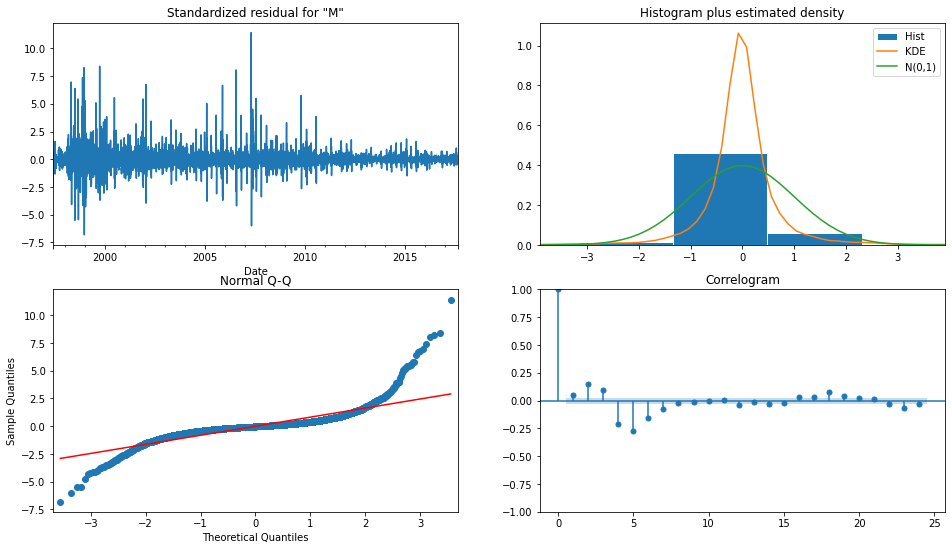

In [46]:
fig = plt.figure(figsize=(16, 9))
fig = arima_2_2_3.plot_diagnostics(fig=fig, lags=24)

## Forecast

The get_forecast(steps) method is ussed to generate forecast information in a neatly wrapped object.

Keep the predictions orgainsied in a dedicated dataframe, beginning with the mean trend prediction:

In [47]:
arima_fcst = arima_2_2_3.get_forecast(steps=5)
arima_predictions = pd.DataFrame(arima_fcst.predicted_mean)
arima_predictions.rename(columns={"predicted_mean": "trend"}, inplace=True)

### Mean trend prediction

Plot the mean prediction

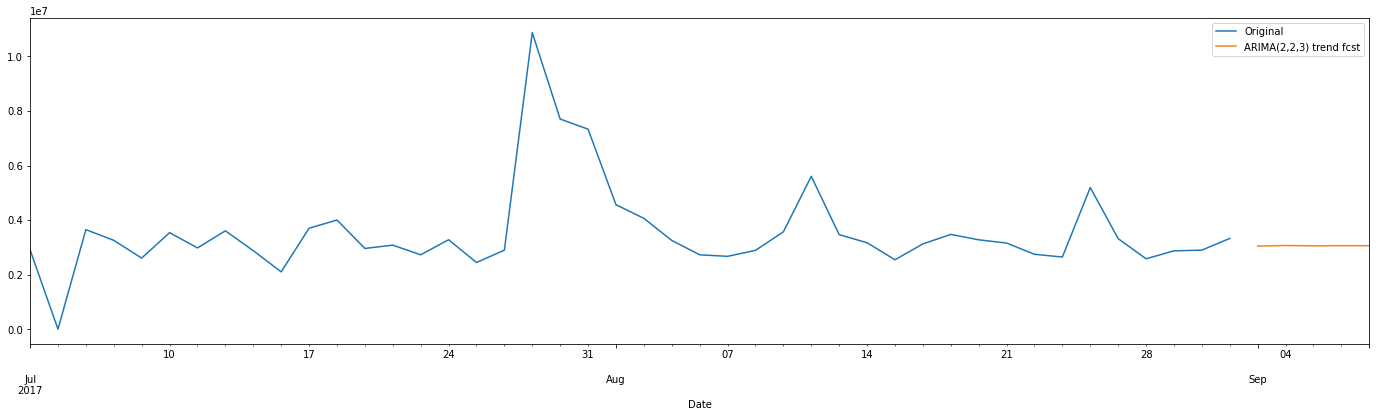

In [48]:
fig, ax_arima_fcst = plt.subplots(figsize=(24,6))
df_temp["2017-07-01":"2017-08-31"]['Volume'].plot(label='Original', ax=ax_arima_fcst)
arima_predictions['trend'].plot(label="ARIMA(2,2,3) trend fcst", ax=ax_arima_fcst)
plt.legend()

### Adding seasonality back into forecasts

In [49]:
arima_predictions['seasonal'] = weekly_means.tolist()
arima_predictions.head()

,trend,seasonal
2017-09-01,3.047427e+06,-950308.018578
2017-09-04,3.067529e+06,222994.445202
2017-09-05,3.055749e+06,699748.450798
2017-09-06,3.061833e+06,309666.987471
2017-09-07,3.060977e+06,-282101.864892


In [50]:
arima_predictions['trend+seasonal'] = arima_predictions['trend'] + arima_predictions['seasonal']
arima_predictions.head()

,trend,seasonal,trend+seasonal
2017-09-01,3.047427e+06,-950308.018578,2.097119e+06
2017-09-04,3.067529e+06,222994.445202,3.290524e+06
2017-09-05,3.055749e+06,699748.450798,3.755498e+06
2017-09-06,3.061833e+06,309666.987471,3.371500e+06
2017-09-07,3.060977e+06,-282101.864892,2.778875e+06


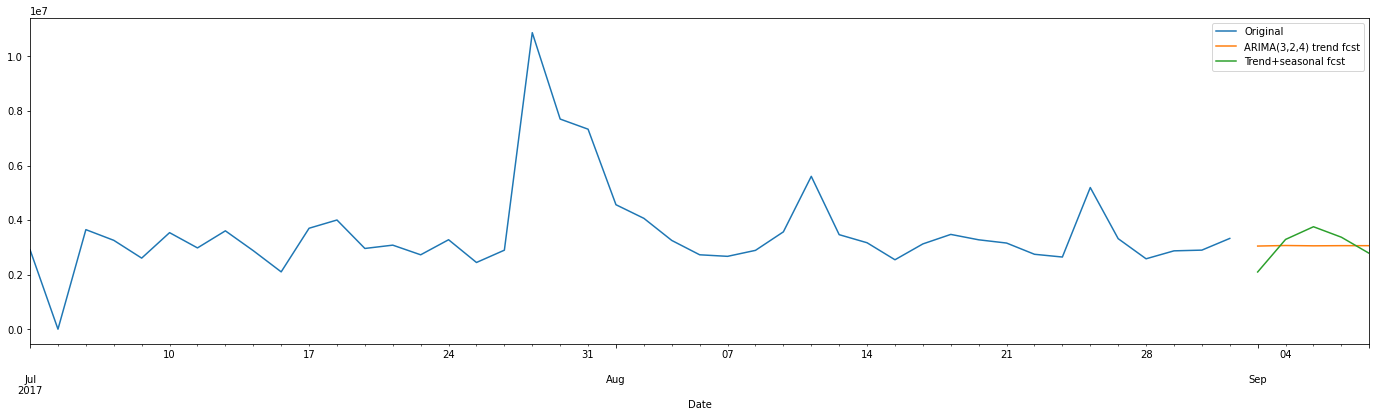

In [51]:
fig, ax_arima_fcst = plt.subplots(figsize=(24,6))
df_temp["2017-07-01":"2017-08-31"]['Volume'].plot(label='Original', ax=ax_arima_fcst)
arima_predictions['trend'].plot(label="ARIMA(3,2,4) trend fcst", ax=ax_arima_fcst)
arima_predictions['trend+seasonal'].plot(label="Trend+seasonal fcst", ax=ax_arima_fcst)
plt.legend()

Plotting a confidence interval for the trend, based on the ARIMA model is easy using the built-in plot_predict() method

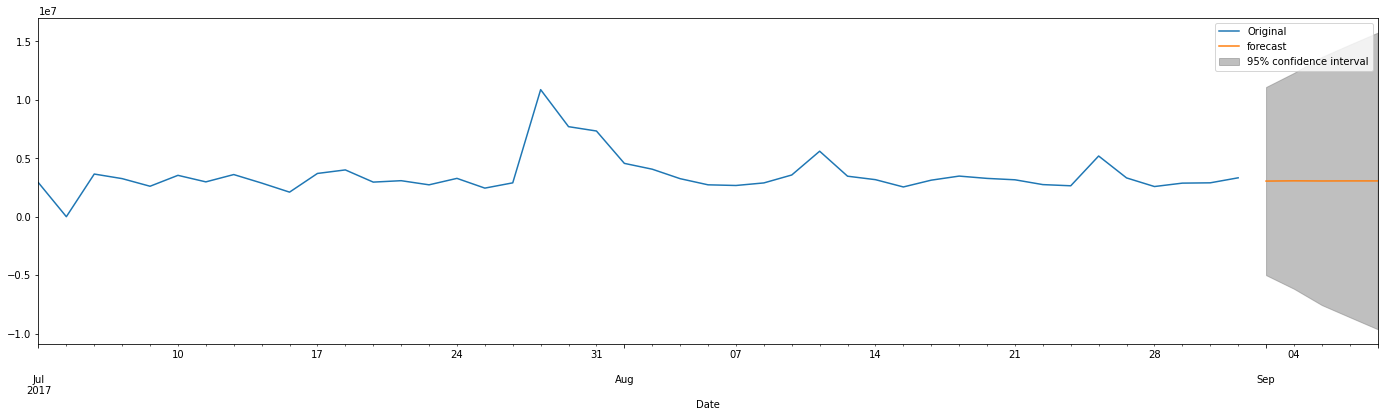

In [52]:
fig, ax_arima_fcst = plt.subplots(figsize=(24,6))
df_temp["2017-07-01":"2017-08-31"]['Volume'].plot(label='Original', ax=ax_arima_fcst)
fig = plot_predict(arima_2_2_3, start="2017-09-01", end="2017-09-07", label='ARIMA(3,2,4) Forecast', ax=ax_arima_fcst)

To do the same for the trend+seasonal series, we have to first access the confidence intervals

In [53]:
arima_fcst.conf_int().head()

,lower MA-5,upper MA-5
2017-09-01,-5.000147e+06,1.109500e+07
2017-09-04,-6.166829e+06,1.230189e+07
2017-09-05,-7.562365e+06,1.367386e+07
2017-09-06,-8.597736e+06,1.472140e+07
2017-09-07,-9.624694e+06,1.574665e+07


In [54]:
arima_predictions = pd.concat([arima_predictions,arima_fcst.conf_int()], axis = 1)
arima_predictions.rename(columns={"lower MA-5": "trend lower CI", "upper MA-5": "trend upper CI"}, inplace=True)
arima_predictions["seasonal lower CI"] = arima_predictions["trend lower CI"] + arima_predictions['seasonal']
arima_predictions["seasonal upper CI"] = arima_predictions["trend upper CI"] + arima_predictions['seasonal']
arima_predictions.head()

,trend,seasonal,trend+seasonal,trend lower CI,trend upper CI,seasonal lower CI,seasonal upper CI
2017-09-01,3.047427e+06,-950308.018578,2.097119e+06,-5.000147e+06,1.109500e+07,-5.950455e+06,1.014469e+07
2017-09-04,3.067529e+06,222994.445202,3.290524e+06,-6.166829e+06,1.230189e+07,-5.943835e+06,1.252488e+07
2017-09-05,3.055749e+06,699748.450798,3.755498e+06,-7.562365e+06,1.367386e+07,-6.862616e+06,1.437361e+07
2017-09-06,3.061833e+06,309666.987471,3.371500e+06,-8.597736e+06,1.472140e+07,-8.288069e+06,1.503107e+07
2017-09-07,3.060977e+06,-282101.864892,2.778875e+06,-9.624694e+06,1.574665e+07,-9.906796e+06,1.546455e+07


Using plt.fill_between(), we can emulate the shaded confidence interval plot:

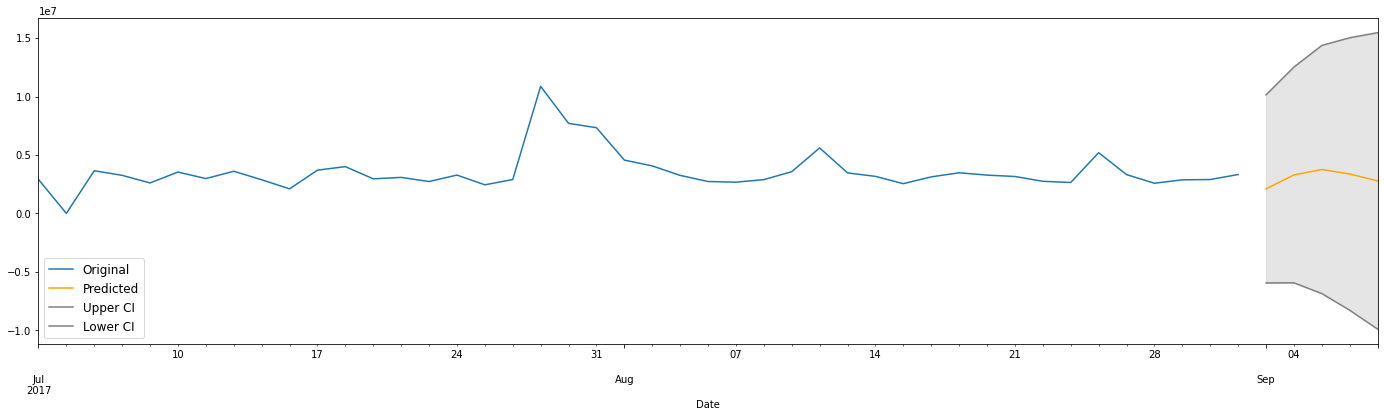

In [55]:
x = arima_predictions.index.values
fig, ax_arima_fcst = plt.subplots(figsize=(24,6))
df_temp["2017-07-01":"2017-08-31"]['Volume'].plot(label='Original', ax=ax_arima_fcst)
arima_predictions['trend+seasonal'].plot(color = 'orange',label = 'Predicted' )
arima_predictions['seasonal upper CI'].plot(color = 'grey', label = 'Upper CI')
arima_predictions['seasonal lower CI'].plot(color = 'grey', label = 'Lower CI')

# plot the legend for the first plot
plt.legend(loc = 'lower left', fontsize = 12)

# fill between the conf intervals
plt.fill_between(x, arima_predictions['seasonal lower CI'], arima_predictions['seasonal upper CI'], color='grey', alpha=0.2)

For some uncertainty occurs, if those values happen lie out of the confidence interval, it should be considered as uncertainty.

# Question 5

## Prepare the data

Based on what we split before, we convert our train and test to a new dataframe

In [56]:
train_df = train[["Open", "High", "Low", "Close", "Volume"]]
test_df = test[["Open", "High", "Low", "Close", "Volume"]]

Keras requires training data inputs to be in the form of numpy arrays:

In [57]:
train_np = np.array(train_df)
test_np = np.array(test_df)

Next, split the data into training and test sets, and scale to values suitable for input to a Keras neural network

In [58]:
from sklearn.preprocessing import MinMaxScaler

# Scale
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_np)
test_scaled = scaler.transform(test_np)

In [59]:
# training data
y_train = train_scaled[:,4]
x_train = train_scaled[:,0:5]

# test data
y_test = test_scaled[:,4]
x_test = test_scaled[:,0:5]

## Configure the neural network

In [60]:
from tensorflow import keras

2022-11-07 04:45:35.752403: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 04:45:35.916652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-07 04:45:35.916712: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-07 04:45:35.956135: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 04:45:36.697557: W tensorflow/stream_executor/platform/de

These parameters are required to compile the model

In [61]:
# Configure model
learning_rate = 0.001 # NN weight update rates

In [62]:
def slff_relu(input_dim,hidden_1_dim = 64):
    # Single-layer FF network with Rectified linear unit (relu) activation fxn
    inputs = keras.layers.Input(shape=(input_dim))
    hidden_layer_1 = keras.layers.Dense(hidden_1_dim, activation='relu')(inputs)
    outputs = keras.layers.Dense(1,activation='tanh')(hidden_layer_1)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

The following calls slff_relu, defining the input dim to be the number of lags of the observations input to the neural network.

In [63]:
## typeout block below to prevent retraining
input_dim = x_train.shape[1] # equal to the number of lagged variables
model = slff_relu(input_dim)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


2022-11-07 04:45:37.337579: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-07 04:45:37.337653: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-07 04:45:37.337686: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (data2001-c700c808.zones.eait.uq.edu.au): /proc/driver/nvidia/version does not exist
2022-11-07 04:45:37.337951: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The summary output gives an overview of the size of the network, in terms of the number of parameters that require training.

The next step is to fit the data. The code below trains for 100 epochs

In [64]:
# Fit
model.fit(x_train, y_train, epochs=100, batch_size=20, shuffle=False)

Epoch 1/100


2022-11-07 04:45:37.477190: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 102060 exceeds 10% of free system memory.
2022-11-07 04:45:37.477403: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 20412 exceeds 10% of free system memory.
2022-11-07 04:45:37.561272: W tensorflow/core/platform/profile_utils/cpu_utils.cc:118] Failed to find bogomips or clock in /proc/cpuinfo; cannot determine CPU frequency
2022-11-07 04:45:37.567843: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 40824 exceeds 10% of free system memory.
2022-11-07 04:45:37.567924: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 40824 exceeds 10% of free system memory.
2022-11-07 04:45:37.568312: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 40824 exceeds 10% of free system memory.


256/256 [==============================] - 0s 757us/step - loss: 0.0021
Epoch 2/100
256/256 [==============================] - 0s 687us/step - loss: 4.8090e-04
Epoch 3/100
256/256 [==============================] - 0s 700us/step - loss: 2.7689e-04
Epoch 4/100
256/256 [==============================] - 0s 705us/step - loss: 1.0422e-04
Epoch 5/100
256/256 [==============================] - 0s 712us/step - loss: 7.1944e-05
Epoch 6/100
256/256 [==============================] - 0s 703us/step - loss: 5.2083e-05
Epoch 7/100
256/256 [==============================] - 0s 709us/step - loss: 4.8375e-05
Epoch 8/100
256/256 [==============================] - 0s 702us/step - loss: 4.7658e-05
Epoch 9/100
256/256 [==============================] - 0s 710us/step - loss: 4.6133e-05
Epoch 10/100
256/256 [==============================] - 0s 714us/step - loss: 4.5247e-05
Epoch 11/100
256/256 [==============================] - 0s 802us/step - loss: 4.5783e-05
Epoch 12/100
256/256 [========================

## Time series point prediction using neural networks

Start by generating the one-step predictions for the test data, using the predict() method

In [65]:
x_test.shape

(50, 5)

In [66]:
# Predict
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 2ms/step


Plot the last few elements of the one-step predictions.

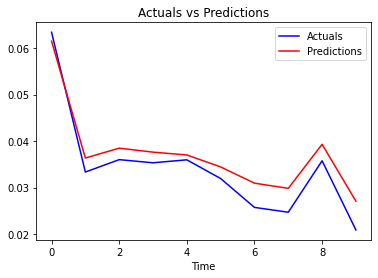

In [67]:
# Plot test data predictions
def plot_pred(y_test,y_pred,period=10):
    plt.figure()
    plt.plot(y_test[-period:], "b", label="Actuals")
    plt.plot(y_pred[-period:], "r", label="Predictions")
    plt.title("Actuals vs Predictions")
    plt.xlabel("Time")
    plt.legend()
    plt.show()

plot_pred(y_test,y_pred)

To get a sense of the goodness of these predictions, we compute and plot the test data errors

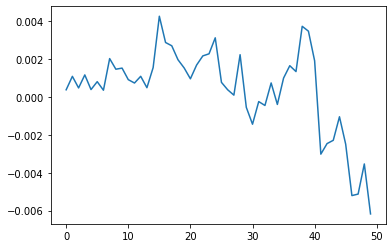

In [68]:
# Compute and plot the test data errors
errors = np.squeeze(y_test) - np.squeeze(y_pred)
plt.plot(errors)

# Question 6

Long short-term memory (LSTM) is a special kind of RNN, capable of learning long-term dependencies, LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn.

Thus I choose LSTM to evaluate the forecast performance of my model-based

In [69]:
LSTM_df = train[["Volume"]]
train_scaled_LSTM = scaler.fit_transform(LSTM_df)

In [70]:
timesteps = 7
x_train_LSTM = []
y_train_LSTM = []
for i in range(timesteps, LSTM_df.shape[0]):
    x_train_LSTM.append(train_scaled_LSTM[i-timesteps:i, 0]) # we take 30 previous prices
    y_train_LSTM.append(train_scaled_LSTM[i, 0]) # and 60-th price as y value
x_train_LSTM, y_train_LSTM = np.array(x_train_LSTM), np.array(y_train_LSTM)

In [71]:
x_train_LSTM = np.reshape(x_train_LSTM, (x_train_LSTM.shape[0], x_train_LSTM.shape[1], 1))
from numpy.random import seed
seed(2019)

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout

model = Sequential()

# Adding the first LSTM layer 
# Here return_sequences=True means whether to return the last output in the output sequence, or the full sequence.
# it basically tells us that there is another(or more) LSTM layer ahead in the network.
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train_LSTM.shape[1], 1)))
# Dropout regularisation for tackling overfitting
model.add(Dropout(0.20))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.25))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
# RMSprop is a recommended optimizer as per keras documentation
# check out https://keras.io/optimizers/ for more details
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(x_train_LSTM, y_train_LSTM, epochs = 100, batch_size = 32)

Epoch 1/100
160/160 [==============================] - 11s 40ms/step - loss: 0.0043
Epoch 2/100
160/160 [==============================] - 6s 35ms/step - loss: 0.0037
Epoch 3/100
160/160 [==============================] - 6s 35ms/step - loss: 0.0037
Epoch 4/100
160/160 [==============================] - 6s 35ms/step - loss: 0.0034
Epoch 5/100
160/160 [==============================] - 6s 35ms/step - loss: 0.0033
Epoch 6/100
160/160 [==============================] - 7s 41ms/step - loss: 0.0030
Epoch 7/100
160/160 [==============================] - 6s 35ms/step - loss: 0.0028
Epoch 8/100
160/160 [==============================] - 6s 35ms/step - loss: 0.0028
Epoch 9/100
160/160 [==============================] - 6s 35ms/step - loss: 0.0027
Epoch 10/100
160/160 [==============================] - 6s 35ms/step - loss: 0.0027
Epoch 11/100
160/160 [==============================] - 6s 36ms/step - loss: 0.0027
Epoch 12/100
160/160 [==============================] - 6s 35ms/step - loss: 0.0027


In [73]:
# this will be used later while comparing and visualization
real_volume_price = test.iloc[:,4:5].values # taking volume

In [74]:
# combine original train and test data vertically
# as previous volume are not present in test dataset  
combine = pd.concat((train['Volume'], test['Volume']), axis = 0)
# our test inputs also contains stock open Prices of last timesteps dates (as described above)
test_inputs = combine[len(combine) - len(test) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

/home/s4558035/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [75]:
# same steps as we followed while processing training data
x_test_LSTM = []
for i in range(timesteps, test.shape[0]+timesteps):
    x_test_LSTM.append(test_inputs[i-timesteps:i, 0])
x_test_LSTM = np.array(x_test_LSTM)
x_test_LSTM = np.reshape(x_test_LSTM, (x_test_LSTM.shape[0], x_test_LSTM.shape[1], 1))
predicted_volume_price = model.predict(x_test_LSTM)
# inverse_transform because prediction is done on scaled inputs
predicted_volume_price = scaler.inverse_transform(predicted_volume_price)

2/2 [==============================] - 1s 6ms/step


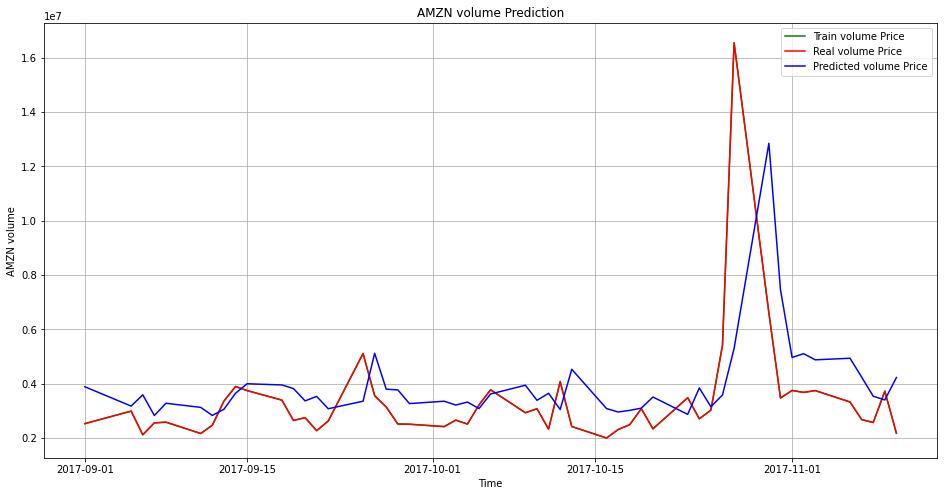

MSE: 4656488968263.219
MAE: 1268426.775
RMSE: 2157889.9342327956


In [77]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.figure(figsize=(16,8))
plt.plot(df.index[-50:], df['Volume'].tail(50), color='green', label = 'Train volume Price')
plt.plot(test.index, real_volume_price, color = 'red', label = 'Real volume Price')
plt.plot(test.index, predicted_volume_price, color = 'blue', label = 'Predicted volume Price')
plt.title('AMZN volume Prediction')
plt.xlabel('Time')
plt.ylabel('AMZN volume')
plt.legend()
plt.grid(True)
plt.savefig('lstm_30.pdf')
plt.show()

mse = mean_squared_error(real_volume_price, predicted_volume_price)
print('MSE: '+str(mse))
mae = mean_absolute_error(real_volume_price, predicted_volume_price)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(real_volume_price, predicted_volume_price))
print('RMSE: '+str(rmse))

AS we can see above, the prediction are very similar to the origin trend, and we get three values here

    MSE: 4656488968263.219
    MAE: 1268426.775
    RMSE: 2157889.9342327956
    
MSE: Which is the square of the difference between the true value and the predicted value, and then get the average of the sum, which is generally used to detect the deviation between the predicted value and the true value of the model

MAE: Which is the average of the absolute error, which can better reflect the actual situation of the prediction value error

RMS: The root mean square offset represents the sample standard deviation of the difference between the predicted and observed values